In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# 1. Carregar o dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
# 2. Padronizar os dados (KNN é baseado em distância!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Criar o modelo KNN
knn_model = KNeighborsClassifier(
    n_neighbors=5,     # número de vizinhos considerados
    weights='uniform', # todos os vizinhos têm o mesmo peso (ou use 'distance')
    metric='minkowski',# distância usada (Minkowski com p=2 é a Euclidiana)
    p=2,               # parâmetro para a métrica de Minkowski
    n_jobs=-1          # usa todos os núcleos disponíveis para acelerar
)

# 5. Treinar o modelo
knn_model.fit(X_train, y_train)

# 6. Avaliar o modelo
y_pred = knn_model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Acurácia: 0.9473684210526315

Relatório de Classificação:
               precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



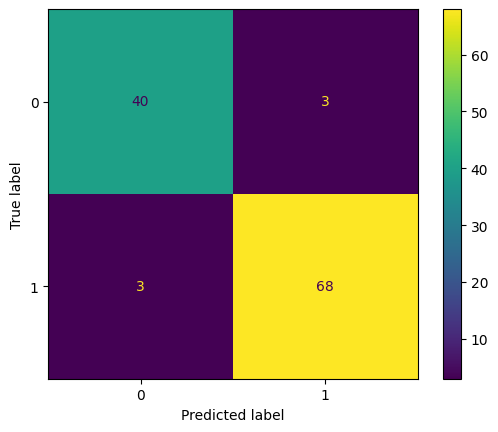

In [4]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()